In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


import scipy.interpolate as interp
#import lalsimulation as lal
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model
import keras
from keras import metrics
import keras_metrics as km
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers 
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from  IPython import display
from matplotlib import pyplot as plt
import pathlib 
import shutil
import tempfile
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
#gpu configuration:

gpu_num = 0

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        tf.config.experimental.set_visible_devices(gpus[gpu_num], 'GPU')
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")


2024-11-24 14:46:07.488469: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-24 14:46:07.590574: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-24 14:46:14.341853: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2 Physical GPUs, 2 Logical GPUs
Visible devices cannot be modified after being initialized


2024-11-24 14:46:22.554540: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46772 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:3b:00.0, compute capability: 8.6
2024-11-24 14:46:22.556847: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 29488 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:af:00.0, compute capability: 8.6


In [37]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor


In [38]:
df = pd.read_csv('polynomial3.csv')

In [39]:
p = pd.read_csv('polynomial3.csv')
p

x1        y1        x2        y2         a         b         c  \
0      0.696302  1.279709  0.686365  1.267915  0.823560  0.156159  0.657519   
1      0.108297  0.998967  0.881506  2.728650  0.907892  0.744646  0.804260   
2      0.284688  0.789271  0.926422  2.205652  0.433524  0.974588  0.945271   
3      0.628338  0.883460  0.845072  1.299471  0.384312  0.250428  0.519537   
4      0.693378  1.085791  0.464369  0.698424  0.308690  0.580303  0.108053   
...         ...       ...       ...       ...       ...       ...       ...   
39995  0.049066  0.396443  0.543286  0.812594  0.371977  0.471870  0.537720   
39996  0.229161  1.029312  0.435101  1.130526  0.985504  0.130413  0.041257   
39997  0.919945  2.255585  0.912392  2.238244  0.987037  0.877973  0.080233   
39998  0.227035  1.064892  0.652308  1.556430  0.963368  0.275167  0.643222   
39999  0.923831  2.349316  0.887549  2.230404  0.742069  0.720593  0.448226   

              d  
0      0.084793  
1      0.787465  
2      0.072900  
3      0.550955  
4      0.968280  
...         ...  
39995  0.159294  
39996  0.976914  
39997  0.504736  
39998  0.503939  
39999  0.708975  

[40000 rows x 8 columns]

In [40]:
#df = df.iloc[:8000]
train_dataset = df.sample(frac=0.8, random_state=1)
test_dataset = df.drop(train_dataset.index)

In [41]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [42]:
train_featuress = train_features.drop(columns = ['a', 'b', 'c', 'd'], axis = 1)
test_featuress = test_features.drop(columns = ['a', 'b', 'c', 'd'], axis = 1)

In [43]:
train_labels = train_features.drop(columns = ['x1', 'y1', 'x2', 'y2'], axis = 1)
test_labels = test_features.drop(columns = ['x1', 'y1', 'x2', 'y2'], axis = 1)

In [44]:
import pandas as pd 
import numpy as np 
from tensorflow import keras 
from tensorflow.keras import layers 
from sklearn.model_selection import train_test_split

In [45]:
from tensorflow import keras
from keras import models, layers
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization

from tensorflow.keras import regularizers

In [46]:
a_train = np.array(train_features["a"])
a_test = np.array(test_features["a"])

In [47]:
train_featuress.shape[1]

4

In [48]:
from tensorflow.keras.models import load_model

model = load_model('best_model.h5')


In [49]:
print(model.summary())  # Optional: Print model architecture


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 228)            │         1,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 228)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 160)            │        36,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │        12,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ a_out (Dense)                   │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,743 (198.22 KB)

 Trainable params: 50,741 (198.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [50]:
#input_layer = Input(shape=(train_featuress.shape[1],)) 

model = model
optimizzer = tf.keras.optimizers.Adam(learning_rate = 0.00022533)
model.compile(optimizer = optimizzer, 
              loss = 'huber', 
              metrics = [tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsoluteError() ], 
             )

dense1 = Dense(units = 228, activation ='linear')(input_layer)
drop1  = Dropout(rate=0.4)(dense1)

dense2 = Dense(units = 160, activation ='tanh')(drop1)
drop1  = Dropout(rate=0.1)(dense2)
dense3 = Dense(units = 80, activation ='elu')(drop1)

#a output
a_out = Dense(units = 1, name  = 'a_out')(dense3)



input_layer  = Input(shape=(train_featuress.shape[1],)) 
dense1 = Dense(units = 64, activation ='relu')(input_layer)
dense2 = Dense(units = 128, activation ='relu')(dense1)
dense3 = Dense(units = 64, activation ='relu')(dense2)

#a output
a_out = Dense(units = 1, name  = 'a_out')(dense3)

model = Model(inputs = input_layer, outputs  = a_out)
optimizzer = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = optimizzer, 
              loss = 'mse', 
              metrics = [tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsoluteError() ], 
             )


In [51]:
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True, verbose=1)

In [56]:
history = model.fit(train_featuress, a_train, 
                    epochs = 200, 
                    batch_size = 64, 
                    validation_split = 0.2, 
                    verbose = 1,
                   callbacks =[early_stopping])

Epoch 1/200
388/400 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - mean_absolute_error: 0.0604 - root_mean_squared_error: 0.0839

I0000 00:00:1732482687.986661  716125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_26', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1732482688.683621  716119 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_31', 176 bytes spill stores, 176 bytes spill loads

I0000 00:00:1732482689.222619  716112 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_31', 332 bytes spill stores, 340 bytes spill loads

I0000 00:00:1732482689.246981  716102 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_26', 236 bytes spill stores, 300 bytes spill loads



400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - loss: 0.0035 - mean_absolute_error: 0.0604 - root_mean_squared_error: 0.0839 - val_loss: 0.0031 - val_mean_absolute_error: 0.0541 - val_root_mean_squared_error: 0.0788
Epoch 2/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0036 - mean_absolute_error: 0.0601 - root_mean_squared_error: 0.0843 - val_loss: 0.0031 - val_mean_absolute_error: 0.0545 - val_root_mean_squared_error: 0.0790
Epoch 3/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0035 - mean_absolute_error: 0.0595 - root_mean_squared_error: 0.0836 - val_loss: 0.0030 - val_mean_absolute_error: 0.0526 - val_root_mean_squared_error: 0.0778
Epoch 4/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0601 - root_mean_squared_error: 0.0846 - val_loss: 0.0031 - val_mean_absolute_error: 0.0523 - val_root_mean_squared_error: 0.0786
Epoch 5/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0035 - mean_absolute_error: 0.0600 - root_mean_squared_

In [57]:
test_predictions = model.predict(test_featuress)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step


(array([ 268., 1024., 1007.,  835.,  839.,  850.,  868.,  919.,  980.,
         410.]),
 array([-0.04 ,  0.067,  0.173,  0.28 ,  0.386,  0.493,  0.599,  0.706,
         0.812,  0.919,  1.025]),
 <BarContainer object of 10 artists>)

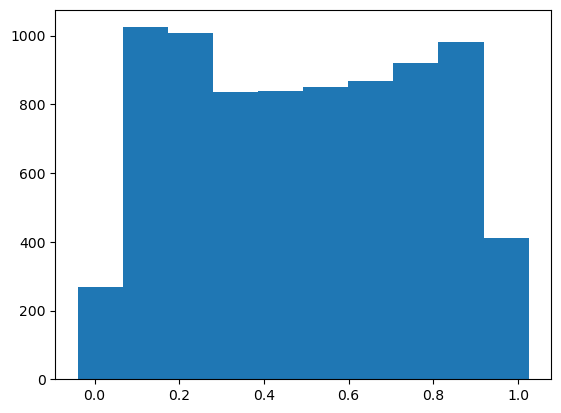

In [58]:
plt.hist(test_predictions)

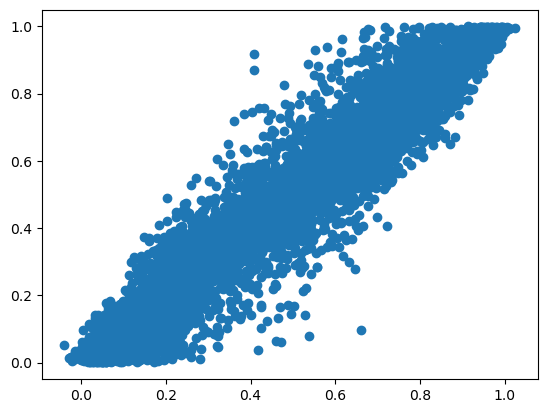

In [59]:
plt.scatter(test_predictions, test_labels['a'])

should i be renormalizing orrrr

In [18]:
len(test_predictions)

6400

## MAKING A

In [19]:
test_predictions_array_length = 6400 
labels_columns = ['a']  
testpredictions = pd.DataFrame(test_predictions, columns=labels_columns)

In [20]:
import numpy as np
import pandas as pd
testpredictions_scaled = (testpredictions - testpredictions.min()) / (testpredictions.max() - testpredictions.min())
#predictions_scaled_df = pd.DataFrame(predictions_scaled, columns=["scaled_predictions"])

In [21]:
testpredictions_scaled

a
0     0.559120
1     0.750451
2     0.352325
3     0.887644
4     0.607950
...        ...
6395  0.160399
6396  0.550507
6397  0.872178
6398  0.489777
6399  0.589850

[6400 rows x 1 columns]

In [22]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold

from tensorflow.keras.layers import Dropout, LayerNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [11]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

test_featuress_reset = test_featuress.reset_index(drop=True)
testpredictions_reset = testpredictions_scaled.reset_index(drop=True)
test_features_a = pd.concat([test_featuress_reset, testpredictions_reset], axis=1)

test_features_a = test_features_a.sample(frac=1, random_state=1) #shuffling train features again !

test_features_a.to_csv('testingpred.csv', index=False)


import numpy as np
import pandas as pd
predictions_scaled = (predictions - predictions.min()) / (predictions.max() - predictions.min())
#predictions_scaled_df = pd.DataFrame(predictions_scaled, columns=["scaled_predictions"])

In [12]:
testpredictions_scaled

NameError: name 'testpredictions_scaled' is not defined

In [ ]:
train_featuress_reset = train_featuress.reset_index(drop=True)
predictions_reset = testpredictions_scaled.reset_index(drop=True)
train_features_anorm = pd.concat([train_featuress_reset, predictions_reset], axis=1)

In [13]:
train_features_anorm.describe()

NameError: name 'train_features_anorm' is not defined

predictions_resetno = predictions.reset_index(drop=True)
train_features_anonorm = pd.concat([train_featuress_reset, predictions_resetno], axis=1)
train_features_anonorm.to_csv('nonorm.csv', index=False)


train_features_anonorm = train_features_anonorm.sample(frac=1, random_state=1) #shuffling train features again !

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=False, verbose=1)

In [15]:
b_train = np.array(train_features["b"])

train_features_a.to_csv('alllabels.csv', index=False)

In [21]:
input_layerb = Input(shape=(train_featuress.shape[1],)) 
dense1b = Dense(units = 228, activation ='linear')(input_layerb)
drop1b  = Dropout(rate=0.4)(dense1b)

dense2b = Dense(units = 160, activation ='tanh')(drop1b)
drop2b  = Dropout(rate=0.1)(dense2b)
dense3b = Dense(units = 80, activation ='elu')(drop2b)

#a output
b_out = Dense(units = 1, name  = 'b_out')(dense3b)

modelb = Model(inputs = input_layerb, outputs  = b_out)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00022533)
modelb.compile(optimizer = optimizer, 
              loss = 'huber', 
              metrics = [tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsoluteError() ], 
             )


import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, LeakyReLU
from tensorflow.keras.models import Model

input_layerb = Input(shape=(train_features_a.shape[1],)) 
dense1b = Dense(units = 128, activation ='leaky_relu')(input_layerb)
dense2b = Dense(units = 128, activation ='leaky_relu')(dense1b)
dense3b = Dense(units = 64, activation ='relu')(dense2b)

#a output
#a_out = Dense(units =1, name = 'a_out')(dense3b)
b_out = Dense(units = 1, name  = 'b_out')(dense3b)

modelb = Model(inputs = input_layerb, outputs  = b_out)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
modelb.compile(optimizer = optimizer, 
              loss = 'mae', 
              metrics = [tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsoluteError() ], 
             )

train_features_anorm

train_features_anorm.shape[1]

early_stopping = EarlyStopping(monitor='val_loss', patience=, restore_best_weights=False, verbose=1)

In [22]:
#train_features_anorm.iloc[:, :4] *= 3.0  # Assign higher weight to first 4 columns

historyb = modelb.fit(
    train_featuress, b_train,
    epochs=200,
    batch_size=8,
    validation_split=0.2,
    verbose=1,
   # callbacks=[early_stopping],
   # sample_weight=np.ones(len(train_features_anorm))  # Default weights
)


Epoch 1/200


I0000 00:00:1732030236.473418 2862440 service.cc:145] XLA service 0x14beec01dec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732030236.473447 2862440 service.cc:153]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1732030236.473449 2862440 service.cc:153]   StreamExecutor device (1): NVIDIA RTX A6000, Compute Capability 8.6
2024-11-19 09:30:36.498023: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-19 09:30:37.092178: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


204/640 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.0689 - mean_absolute_error: 0.3026 - root_mean_squared_error: 0.3704

I0000 00:00:1732030239.061622 2862440 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/640 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 0.0543 - mean_absolute_error: 0.2649 - root_mean_squared_error: 0.3277

I0000 00:00:1732030240.024563 2863915 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_31', 8 bytes spill stores, 8 bytes spill loads



640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0540 - mean_absolute_error: 0.2641 - root_mean_squared_error: 0.3267 - val_loss: 0.0253 - val_mean_absolute_error: 0.1865 - val_root_mean_squared_error: 0.2251
Epoch 2/200
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 0.0288 - mean_absolute_error: 0.1971 - root_mean_squared_error: 0.2398 - val_loss: 0.0216 - val_mean_absolute_error: 0.1719 - val_root_mean_squared_error: 0.2079
Epoch 3/200
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0255 - mean_absolute_error: 0.1843 - root_mean_squared_error: 0.2256 - val_loss: 0.0206 - val_mean_absolute_error: 0.1671 - val_root_mean_squared_error: 0.2031
Epoch 4/200
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - loss: 0.0240 - mean_absolute_error: 0.1806 - root_mean_squared_error: 0.2190 - val_loss: 0.0187 - val_mean_absolute_error: 0.1593 - val_root_mean_squared_error: 0.1936
Epoch 5/200
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - loss: 0.0224 - mean_absolute_error: 0.1728 - root_mean_squa

#train_features_anorm.iloc[:, :3] *= 0.3  # weighting to 

historyb = modelb.fit(
    train_features_anorm, b_train,
    epochs=200,
    batch_size=8,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping],
    sample_weight=np.ones(len(train_features_anorm))  # Default weights
)


historyb = modelb.fit(
    train_features_a, b_train,
    epochs=200,
    batch_size=8,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping, lr_scheduler]
)

In [23]:
test_predictionsb = modelb.predict(train_featuress)

I0000 00:00:1732030527.261194 2888694 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_20', 8 bytes spill stores, 16 bytes spill loads

I0000 00:00:1732030528.142766 2888688 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_20', 4 bytes spill stores, 4 bytes spill loads



200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 543us/step


In [24]:
test_predictionsb

array([[0.076],
       [0.557],
       [0.587],
       ...,
       [0.549],
       [0.264],
       [0.646]], dtype=float32)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

predictions_array_length = 8000 
features_columns = ['x1', 'y1', 'x2', 'y2']
labels_columns = ['b']  

predictions = pd.DataFrame(test_predictionsb, columns=labels_columns)

fig, axs = plt.subplots(1, 3, figsize=(16, 5)) 

color = 'darkblue'

axs[0].hist(df['b'], color=color, range=(np.min(df['b']), np.max(df['b'])))
axs[0].set_title("Label Distribution (b)")
axs[0].set_xlabel("Value of b")
axs[0].set_ylabel("Frequency")   
#same x-axis bounds
#axs[1].hist(predictions['a'], color=color, range=(np.min(df['a']), np.max(df['a'])))
#axs[1].set_title("Prediction Distribution (a)")

axs[1].hist(predictions['b'], color=color)
axs[1].set_title("Prediction Distribution (b), no bounds on x")
axs[1].set_xlabel("Value of b")  
axs[1].set_ylabel("Frequency")   

axs[2].scatter(train_labels['b'], predictions['b'], marker='.')
slope, intercept = np.polyfit(train_labels['b'], predictions['b'], 1)
axs[2].plot(train_labels['b'], slope * train_labels['b'] + intercept, color='red', label = 'best fit')


min_val = min(np.min(train_labels['b']), np.min(predictions['b']))
max_val = max(np.max(train_labels['b']), np.max(predictions['b']))
axs[2].plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='--', label='y = x')
#standard dev
std_dev = np.std(predictions['b'])

axs[2].set_title("Labels vs Predictions")
axs[2].set_xlabel("Label 'True' Values of b")  
axs[2].set_ylabel("Predicted Values of b")  
axs[2].legend()
axs[2].legend(title=f'std: {std_dev:.2f}') 

plt.tight_layout()
plt.subplots_adjust(top=0.85) 
fig.suptitle('Distributions of Labels and Predictions for b', fontsize=16)
plt.show()


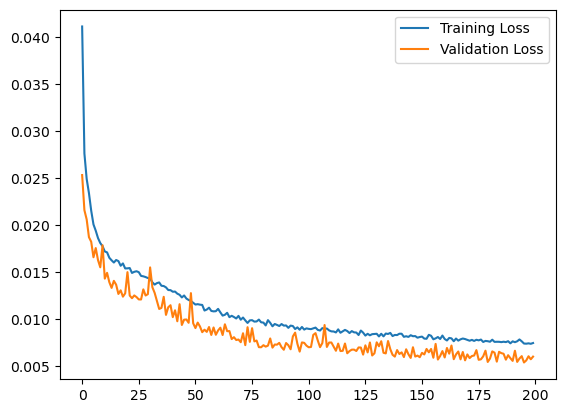

In [25]:
plt.plot(historyb.history['loss'], label='Training Loss')
plt.plot(historyb.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [26]:
rmse_b_train = historyb.history['root_mean_squared_error']
rmse_b_val = historyb.history['val_root_mean_squared_error']
mae_b_train = historyb.history['mean_absolute_error']
mae_b_val = historyb.history['val_mean_absolute_error']

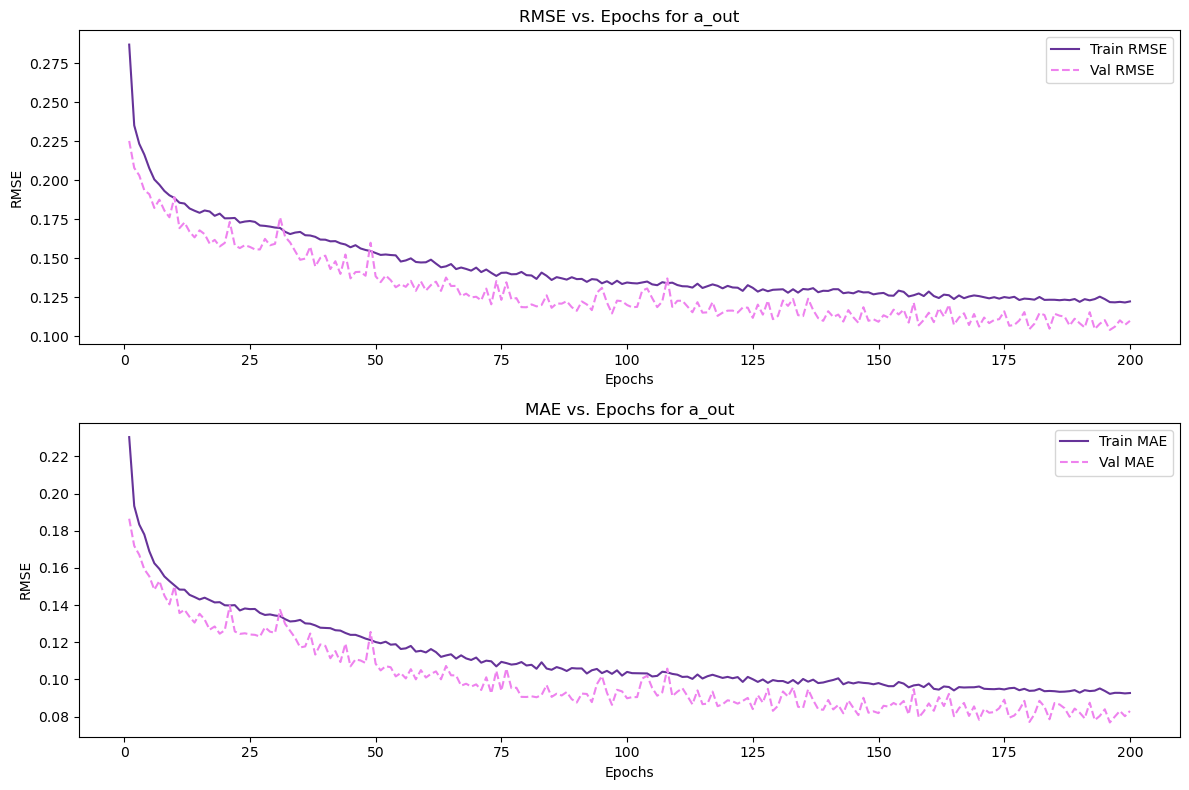

In [27]:
epochs = range(1, len(rmse_b_train) + 1)

plt.figure(figsize=(12, 8))

# Plot for a_out
plt.subplot(2,1,1)
plt.plot(epochs, rmse_b_train, label='Train RMSE', color = 'rebeccapurple')
plt.plot(epochs, rmse_b_val, '--', label='Val RMSE', color  ='violet')
plt.title('RMSE vs. Epochs for a_out')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

# Plot for b_out
plt.subplot(2, 1, 2)
plt.plot(epochs, mae_b_train, label='Train MAE', color = 'rebeccapurple')
plt.plot(epochs, mae_b_val, '--', label='Val MAE', color = 'violet')
plt.title('MAE vs. Epochs for a_out')
plt.xlabel('Epochs')
plt.tight_layout()
plt.ylabel('RMSE')
plt.legend()

In [28]:
labels_columns = ['b']  

predictionsb = pd.DataFrame(test_predictionsb, columns=labels_columns)

## on train data

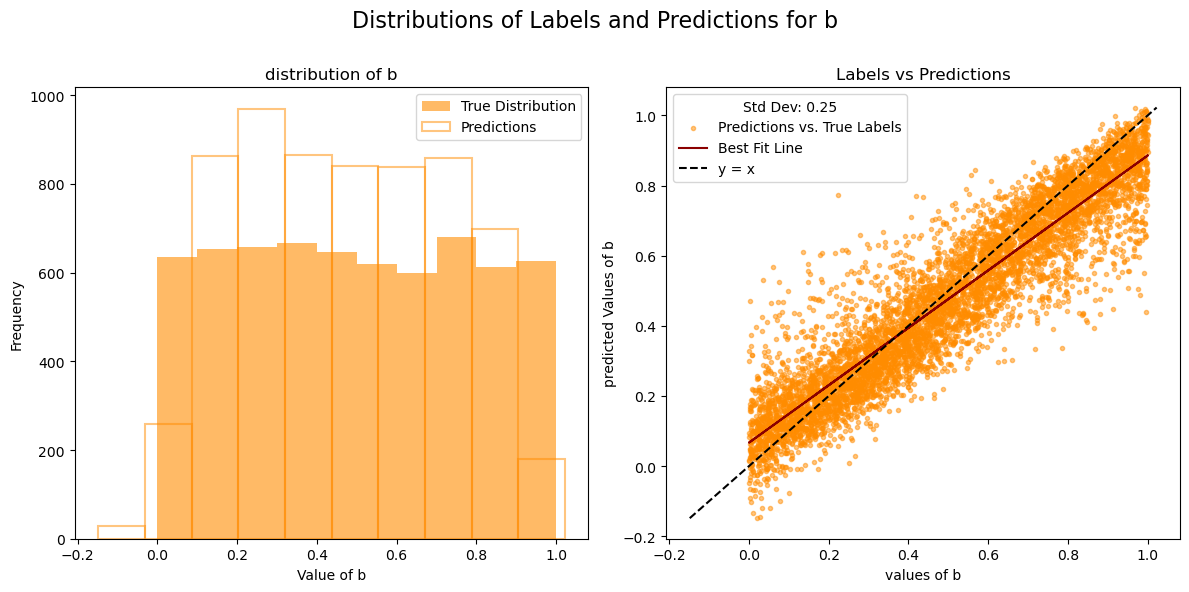

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

features_columns = ['x1', 'y1', 'x2', 'y2', 'a']


fig, axs = plt.subplots(1, 2, figsize=(12, 6)) 

color = 'darkorange'

axs[0].hist(train_labels['b'], color=color, range=(np.min(df['b']), np.max(df['b'])), label="True Distribution", alpha = 0.6)
axs[0].hist(test_predictionsb, color=color, alpha=0.5, label="Predictions", edgecolor = color, fill = False, linewidth=1.5)

axs[0].set_title("distribution of b")
axs[0].set_xlabel("Value of b")
axs[0].set_ylabel("Frequency")   
axs[0].legend()

axs[1].scatter(train_labels['b'], test_predictionsb, marker='.', alpha=0.5, label="Predictions vs. True Labels", color = color)
slope, intercept = np.polyfit(train_labels['b'], test_predictionsb, 1)
axs[1].plot(train_labels['b'], slope * train_labels['b'] + intercept, color='darkred', label='Best Fit Line')

min_val = min(np.min(train_labels['b']), np.min(test_predictionsb))
max_val = max(np.max(train_labels['b']), np.max(test_predictionsb))
axs[1].plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='y = x')

std_dev = np.std(test_predictionsb)
axs[1].set_title("Labels vs Predictions")
axs[1].set_xlabel("values of b")  
axs[1].set_ylabel("predicted Values of b")  
axs[1].legend(title=f'Std Dev: {std_dev:.2f}')

plt.tight_layout()
plt.subplots_adjust(top=0.85) 
fig.suptitle('Distributions of Labels and Predictions for b', fontsize=16)
plt.show()


## on testing data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
features_columns = ['x1', 'y1', 'x2', 'y2', 'a']


fig, axs = plt.subplots(1, 2, figsize=(12, 6)) 

color = 'tomato'

axs[0].hist(test_labels['b'], color=color, range=(np.min(df['b']), np.max(df['b'])), label="True Distribution", alpha = 0.6)
axs[0].hist(predictionsb['b'], color=color, alpha=0.5, label="Predictions", edgecolor = color, fill = False, linewidth=1.5)

axs[0].set_title("distribution of a")
axs[0].set_xlabel("Value of a")
axs[0].set_ylabel("Frequency")   
axs[0].legend()

axs[1].scatter(test_labels['b'], predictionsb['b'], marker='.', alpha=0.5, label="Predictions vs. True Labels", color = color)
slope, intercept = np.polyfit(test_labels['b'], predictions['b'], 1)
axs[1].plot(test_labels['b'], slope * test_labels['a'] + intercept, color='darkred', label='Best Fit Line')

min_val = min(np.min(test_labels['b']), np.min(predictionsb['b']))
max_val = max(np.max(test_labels['b']), np.max(predictionsb['b']))
axs[1].plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='y = x')

std_dev = np.std(predictionsb['b'])
axs[1].set_title("Labels vs Predictions")
axs[1].set_xlabel("values of a")  
axs[1].set_ylabel("predicted Values of a")  
axs[1].legend(title=f'Std Dev: {std_dev:.2f}')

plt.tight_layout()
plt.subplots_adjust(top=0.85) 
fig.suptitle('Distributions of Labels and Predictions for a', fontsize=16)
plt.show()
